# Instructions
- Refactor the code in the loop and generate a function called “simulate_game” to improve modularity.

- Create a function with two arguments:
        - shuffled_deck: a shuffled array of cards
        - threshold: a numerical limit that determines when to stop dealing new cards
    - The function should return the hand of the player as an array at the end of the dealing.

- Let’s imagine two players at the same table, and each of them applies a different strategy with different thresholds. Define a new function called “duel_play” to simulate this scenario.
    - It should have two arguments: Threshold 1 and Threshold 2.
    - It should simulate a play between two players with different thresholds and return the winning player’s threshold.
    - If there is no winner, return 0.
    - Use the “simulate_game” function to simulate games for Threshold 1 and Threshold 2 in the “duel_play” function.
    - In the beginning of the duel_play function , shuffle the deck of 52 and use it for both thresholds. Deal different cards to each simulation. For example, if the first simulation dealt with 3 cards, then discard these from the shuffled deck and continue with the remaining list.

- Compete different strategies against each other, and in every turn, save the winner to a list.
    - Create an empty list called "winners".
    - For a threshold list in the range (10,20), run the duel_play function and make every element of the list play against others. At the end, you should get 100 plays.
    - Repeat the previous step 10,000 times and save the winner thresholds to a list. At the end, the winner list should have a length of 100*10,000 = 1,000,000.

- Visualize the histogram of the winners list.
    - See the distribution of winners. The winning strategy can be deduced from this graph, which indicates the winning probabilities of different strategies.

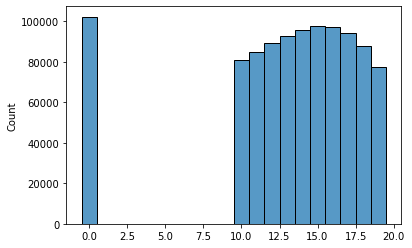

In [2]:
# %load battle_strategies.py
import random
import seaborn as sb
from itertools import product, chain

random.seed(0)


def create_deck():
    """
    Create a list that represents the card deck

    Cards are represented by a number according to the following rules:
    - Cards from 2 to 10 are represented by their number
    - Jacks, Queens, and Kings (court cards) are represented by the number 10
    - Aces are represented by 11

    Card suits (clubs, diamonds, hearts, and spades) don't matter in the game, so they're not recorded.
    
    Copied from create_deck.py
    """
    numeric_cards = range(2,11)
    value_court_cards = 10
    n_court_cards = 3
    value_ace = 11

    cards_in_a_suit = list(numeric_cards) + [value_court_cards]*n_court_cards + [value_ace]
    deck = 4 * cards_in_a_suit

    return deck


def alter_ace(hand):
    """
    Changes an ace from 11 to 1
    """
    hand.remove(11)
    hand.append(1)
    return hand


def simulate_one_game(deck, threshold):
    hand = [deck.pop(), deck.pop()]

    # there are exactly 2 aces
    # so use use of them as 1 instead of 11
    if sum(hand) == 22:
        hand = alter_ace(hand)

    while sum(hand) < threshold:
        hand.append(deck.pop())
        if sum(hand) > 21 and 11 in hand:
            hand = alter_ace(hand)
    
    return hand


def duel_play(threshold_1, threshold_2):
    """
    Simulate 2 strategies playing against each other
    
    Each strategy can have a different threshold for stopping.
    Cards are dealt first to one player until it finishes its game and then to the second.
    """
    deck = create_deck()
    random.shuffle(deck)
    
    sum_1 = sum(simulate_one_game(deck, threshold_1))
    sum_2 = sum(simulate_one_game(deck, threshold_2))

    winner = None

    if (sum_1 > 21 and sum_2 > 21) or sum_1 == sum_2:
        winner = 0
    elif sum_2 > 21:
        winner = threshold_1
    elif sum_1 > 21:
        winner = threshold_2
    # here I already know that both are smaller than 21 so I can check one against the other
    elif sum_1 > sum_2:
        winner = threshold_1
    elif sum_2 > sum_1:
        # or could be simply else I believe, but I'm being explicit
        winner = threshold_2

    return winner


def duel_all_combinations():
    """
    Duel all possible thresholds against each other
    
    Possible thresholds are from 10 to and including 19.
    """
    possible_thresholds = range(10, 20)
    all_possible_combinations = product(possible_thresholds, repeat=2)
    winners = [duel_play(threshold_1, threshold_2) for threshold_1, threshold_2 in all_possible_combinations]
    return winners


def run_simulation(n_simulations=100):
    """
    Run the simulations all vs all n times and plots a histogram of the winners
    """
    all_winners = list(chain(*(duel_all_combinations() for _ in range(n_simulations))))
    sb.histplot(all_winners, discrete=True)
    

if __name__ == '__main__':
    run_simulation(10000)